In [239]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # ['r', 'python'] -> [r, python]

In [240]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."


In [241]:
# Listed the job counts based on country name
df_DA_country = df_DA['job_country'].value_counts().to_frame().head(20)
df_DA_country = df_DA_country[1:20]
list_of_countries = df_DA_country.index.to_list()

# Because of the currency deficit, need to remove some of the countries 
list_to_remove = ['Singapore', 'India', 'Philippines','Mexico', 'United Arab Emirates', 'Malaysia', 'South Africa', 'Canada']
for i in range(len(list_to_remove)):
    list_of_countries.remove(list_to_remove[i])

df_DA_country = df_DA[df_DA['job_country'].isin(list_of_countries)]
#df_DA_country.value_counts('job_title_short') there are 61.324 job postings
# list_of_countries countries that we work on: ['France','United Kingdom','Germany' 'Spain','Italy','Netherlands','Portugal','Belgium','Poland 'Ireland','Switzerland']

In [242]:
# We have 61324 job postings 
df_DA_EU_exploded = df_DA_country.explode('job_skills')
df_DA_EU_exploded.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,sql,"{'analyst_tools': ['excel', 'power bi', 'sap']..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,php,"{'analyst_tools': ['excel', 'power bi', 'sap']..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,excel,"{'analyst_tools': ['excel', 'power bi', 'sap']..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,power bi,"{'analyst_tools': ['excel', 'power bi', 'sap']..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,sap,"{'analyst_tools': ['excel', 'power bi', 'sap']..."


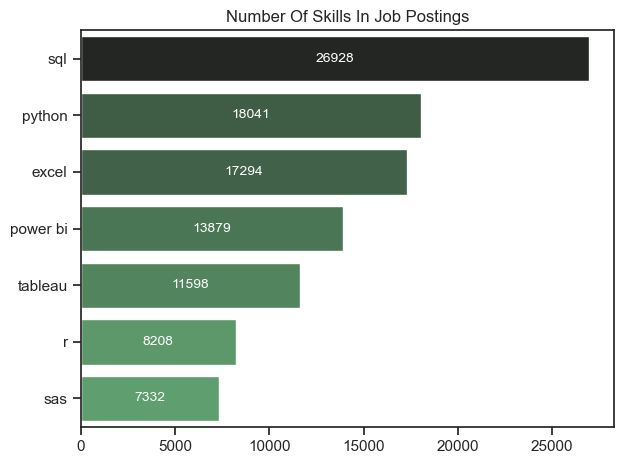

In [243]:
#df_DA_EU_exploded.shape[0]   -   192.230
#df_DA_EU_exploded.dropna(subset='job_skills').shape[0]     -     179.794
df_DA_EU_exploded_plot =  df_DA_EU_exploded['job_skills'].value_counts().to_frame().head(7)

sns.set_theme(style='ticks')
plt.title('Number Of Skills In Job Postings')

ax = sns.barplot(data=df_DA_EU_exploded_plot, x='count', y='job_skills', hue='count', palette='dark:g_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10) 

plt.ylabel('')
plt.xlabel('')

plt.legend().remove()
plt.tight_layout()    


In [244]:
df_DA_EU_exploded_salary = df_DA_EU_exploded.dropna(subset='salary_year_avg')
df_DA_EU_exploded_salary = df_DA_EU_exploded_salary.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_EU_exploded_salary = df_DA_EU_exploded_salary.head(10).sort_values(by='count',ascending=False)
df_DA_EU_exploded_salary

,count,median
job_skills,,
sql,179,98500.0
python,133,98500.0
excel,92,75575.0
tableau,90,100500.0
r,52,98500.0
power bi,50,84975.0
azure,38,96625.0
looker,35,111175.0
spark,31,111175.0


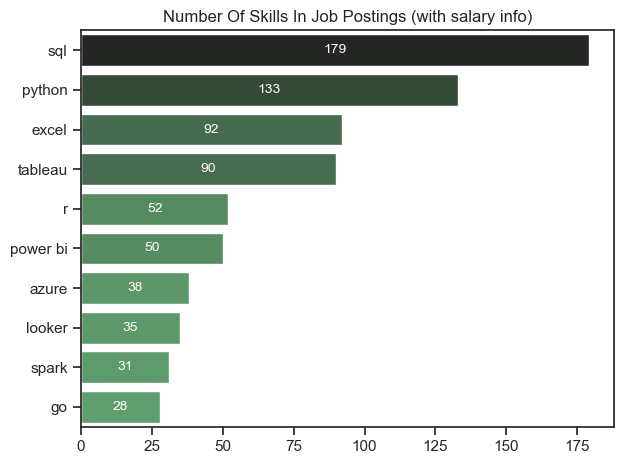

In [245]:
sns.set_theme(style='ticks')
plt.title('Number Of Skills In Job Postings (with salary info)')

ax = sns.barplot(data=df_DA_EU_exploded_salary, x='count', y='job_skills', hue='count', palette='dark:g_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10) 

plt.ylabel('')
plt.xlabel('')

plt.legend().remove()
plt.tight_layout()    


In [246]:
df_DA_EU_exploded_salary = df_DA_EU_exploded_salary.head(10).sort_values(by='median',ascending=False)

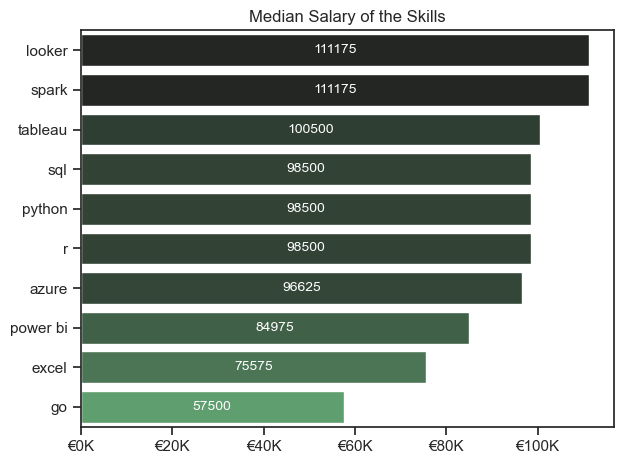

In [247]:
sns.set_theme(style='ticks')
plt.title('Median Salary of the Skills')

ax = sns.barplot(data=df_DA_EU_exploded_salary, x='median', y='job_skills', hue='median', palette='dark:g_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10) 

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'€{int(x/1000)}K'))

plt.xlabel('')
plt.ylabel('')
plt.legend().remove()
plt.tight_layout()    


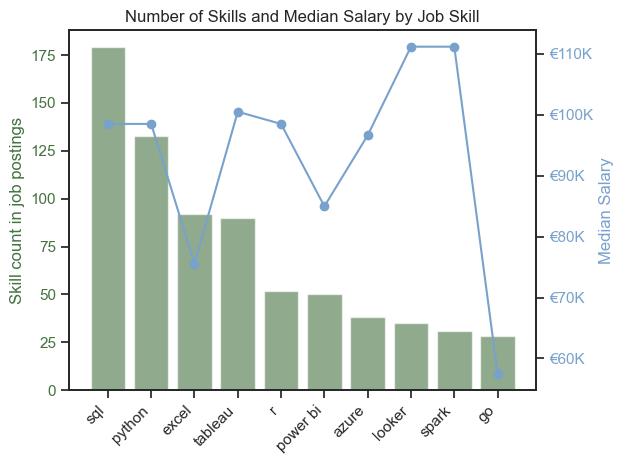

In [248]:
df_DA_exploded_salary = df_DA_EU_exploded_salary.head(10).sort_values(by='count',ascending=False)

fig, ax1 = plt.subplots()

# Plot number of skills in job postings
ax1.set_xlabel('')
ax1.set_ylabel('Skill count in job postings', color='#447241')
ax1.bar(df_DA_exploded_salary.index, df_DA_exploded_salary['count'], color='#447241', alpha=0.6, label='Number of Skills')
ax1.tick_params(axis='y', labelcolor='#447241')
plt.xticks(rotation=45, ha='right')


# Create a second y-axis to plot median salary
ax2 = ax1.twinx()  
ax2.set_ylabel('Median Salary', color='#78A2CC')
ax2.plot(df_DA_exploded_salary.index ,df_DA_exploded_salary['median'], color='#78A2CC', marker='o', label='Median Salary')
ax2.tick_params(axis='y', labelcolor='#78A2CC')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'€{int(x/1000)}K'))


# Add a title
plt.title('Number of Skills and Median Salary by Job Skill')

# Add legends
ax1.legend().remove()
ax2.legend().remove()

plt.tight_layout()

/var/folders/73/n1fgp9kj4190smcl0_0_ccr00000gn/T/ipykernel_11639/2318246200.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].pie([percentages[i], 100 - percentages[i]],


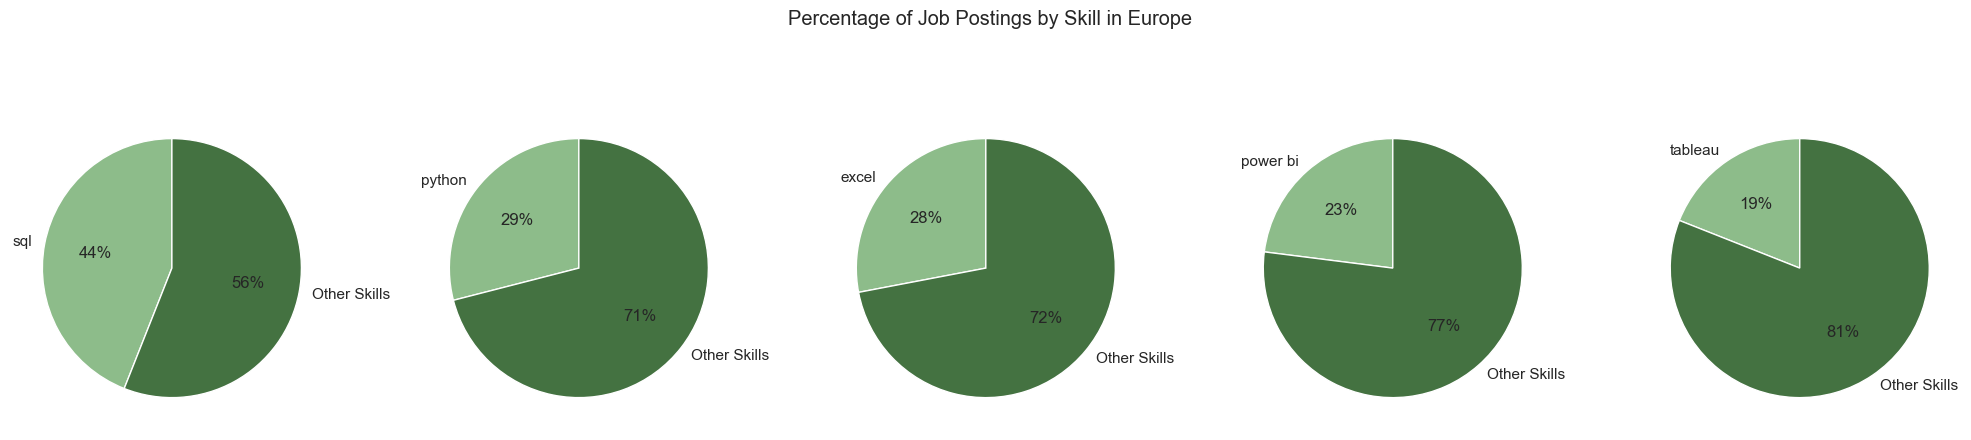

In [249]:
# We will find the percentage of the skills over total jobs, we are not looking for salary details. So we will use wider data frame.
# There are 61.324 job postings ( df_DA_country ) 
total_postings_EU = df_DA_country.shape[0]

df_DA_EU_plot = df_DA_EU_exploded['job_skills'].value_counts().to_frame().head(5)
df_DA_EU_plot['total_job_count'] = total_postings_EU
df_DA_EU_plot['percentage'] = (df_DA_EU_plot['count'] / total_postings_EU) * 100
df_DA_EU_plot['percentage'] = df_DA_EU_plot['percentage'].round(0)

percentages = df_DA_EU_plot['percentage']
total_postings = df_DA_EU_plot['total_job_count']

# Create a figure with subplots (1 row, 5 columns for 5 pie charts)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

# Iterate over the job skills and plot individual pie charts
for i, skill in enumerate(df_DA_EU_plot.index):
    ax[i].pie([percentages[i], 100 - percentages[i]], 
                labels=[skill, 'Other Skills'], 
                autopct='%1.0f%%', 
                startangle=90, 
                colors=['#8dbc8a', '#447241'])
    
fig.suptitle('Percentage of Job Postings by Skill in Europe')
plt.tight_layout()
plt.show()

# About Turkiye

In [250]:
df_DA_TR = df_DA[(df_DA['job_country'] == 'Turkey')]
df_DA_TR_exploded = df_DA_TR.explode('job_skills')
df_DA_TR_exploded.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
4225,Data Analyst,Data Analyst,"Ankara, Türkiye",via LinkedIn,Full-time,False,Turkey,2023-12-25 13:26:52,False,False,Turkey,None,NaN,NaN,Türkiye Ürün İhtisas Borsası / Turkish Mercant...,python,"{'programming': ['python', 'sql', 'r']}"
4225,Data Analyst,Data Analyst,"Ankara, Türkiye",via LinkedIn,Full-time,False,Turkey,2023-12-25 13:26:52,False,False,Turkey,None,NaN,NaN,Türkiye Ürün İhtisas Borsası / Turkish Mercant...,sql,"{'programming': ['python', 'sql', 'r']}"
4225,Data Analyst,Data Analyst,"Ankara, Türkiye",via LinkedIn,Full-time,False,Turkey,2023-12-25 13:26:52,False,False,Turkey,None,NaN,NaN,Türkiye Ürün İhtisas Borsası / Turkish Mercant...,r,"{'programming': ['python', 'sql', 'r']}"


In [251]:
df_DA_TR_count = df_DA_TR_exploded['job_skills'].value_counts().to_frame()
df_DA_TR_count = df_DA_TR_count.head(5)
df_DA_TR_count


,count
job_skills,
sql,102
python,68
tableau,50
excel,46
power bi,34


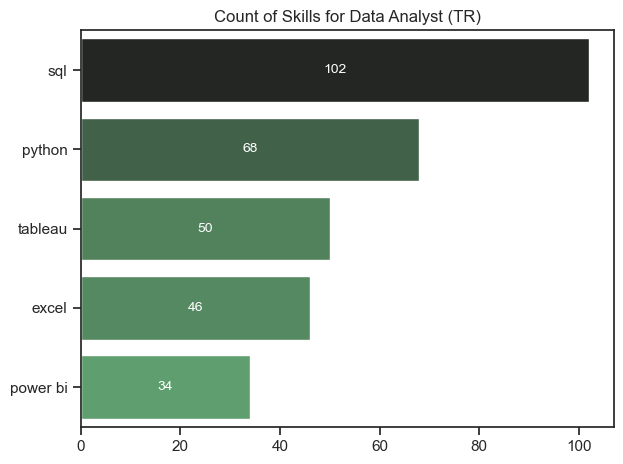

In [256]:
sns.set_theme(style='ticks')
plt.title('Count of Skills for Data Analyst (TR)')
ax = sns.barplot(data=df_DA_TR_count, x='count', y='job_skills', hue='count', palette='dark:g_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10) 

plt.xlabel('')
plt.ylabel('')
plt.legend().remove()
plt.tight_layout()    

In [253]:
number_postings_TR = df_DA[(df_DA['job_country'] == 'Turkey')].shape[0] # Gets the number of rows in the filtered DataFrame

df_DA_TR_count['percentage'] = (df_DA_TR_count['count'] / number_postings_TR) * 100
df_DA_TR_count['total_job_posting'] = number_postings_TR
df_DA_TR_count['percentage'] = df_DA_TR_count['percentage'].round(0)
df_DA_TR_count

,count,percentage,total_job_posting
job_skills,,,
sql,102,55.0,187
python,68,36.0,187
tableau,50,27.0,187
excel,46,25.0,187
power bi,34,18.0,187


/var/folders/73/n1fgp9kj4190smcl0_0_ccr00000gn/T/ipykernel_11639/3239059173.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].pie([percentages[i], 100 - percentages[i]],


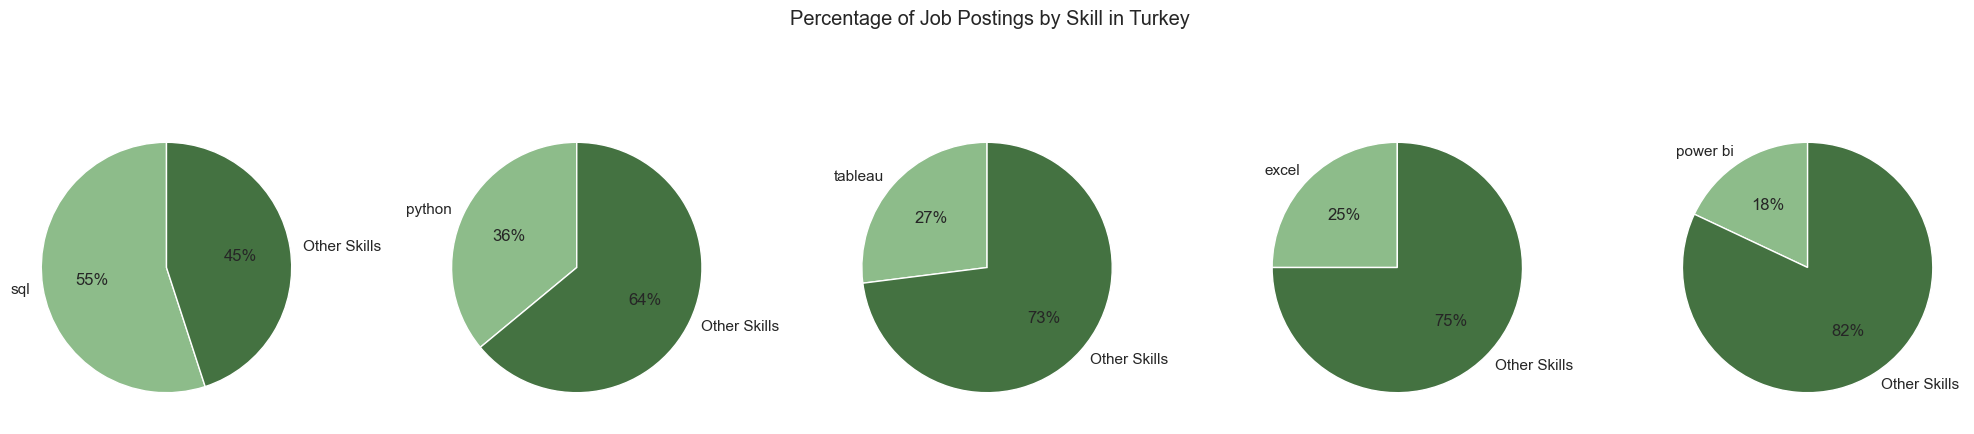

In [254]:
percentages = df_DA_TR_count['percentage']
total_postings = df_DA_TR_count['total_job_posting']

# Create a figure with subplots (1 row, 5 columns for 5 pie charts)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

# Iterate over the job skills and plot individual pie charts
for i, skill in enumerate(df_DA_TR_count.index):
    ax[i].pie([percentages[i], 100 - percentages[i]], 
                labels=[skill, 'Other Skills'], 
                autopct='%1.0f%%', 
                startangle=90, 
                colors=['#8dbc8a', '#447241'])
    
fig.suptitle('Percentage of Job Postings by Skill in Turkey')
plt.tight_layout()
plt.show()
